In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# x[n]: Unit Step Signal
def x(n: int) -> int:
    return 1 if abs(n) < 5 else 0

# X(e^jω): Discrete-Time Fourier Transform of x[n]
def X(w: float) -> complex:
    total = 0
    for k in range(-10, 11):
        total += x(k) * np.exp(-1j * w * k)
    return total

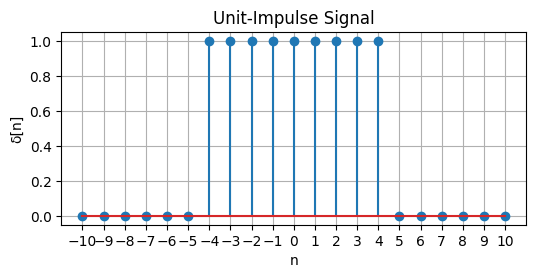

In [3]:
# Plot x[n]

plt.figure(figsize=(6, 2.5))

N = range(-10, 11)

plt.stem(N, [x(n) for n in N])
plt.xticks(range(-10, 11))

plt.title("Unit-Impulse Signal")
plt.xlabel("n")
plt.ylabel("δ[n]")
plt.grid(True)

Text(0.5, 0, 'ω')

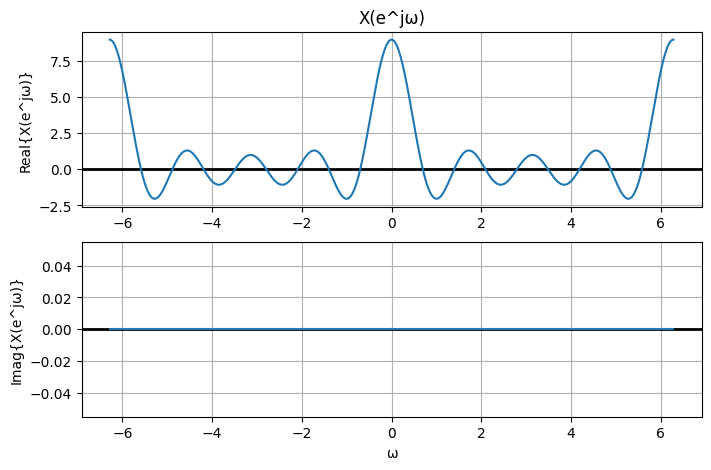

In [4]:
W = np.linspace(-2*np.pi, 2*np.pi, 1000)

dtft = np.array([X(w).real + np.round(X(w).imag, 10) for w in W])

fig, axes = plt.subplots(2, 1, figsize=(8, 5))
for i in range(2):
    axes[i].axhline(y=0, color="black", linewidth=2)
    axes[i].grid(True)

axes[0].set_title("X(e^jω)")

axes[0].plot(W, np.real(dtft))
axes[1].plot(W, np.imag(dtft))

axes[0].set_ylabel("Real{X(e^jω)}")
axes[1].set_ylabel("Imag{X(e^jω)}")

axes[1].set_xlabel("ω")


Text(0.5, 0, 'ω')

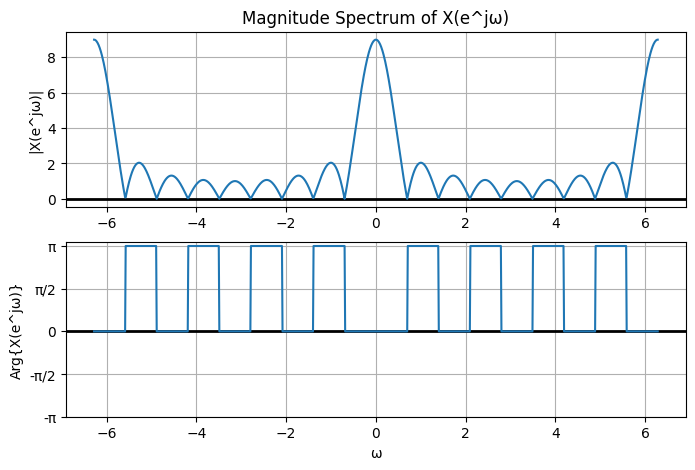

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
for i in range(2):
    axes[i].axhline(y=0, color="black", linewidth=2)
    axes[i].grid(True)

axes[0].set_title("Magnitude Spectrum of X(e^jω)")

axes[0].plot(W, abs(dtft))
axes[1].plot(W, np.angle(dtft))

axes[0].set_ylabel("|X(e^jω)|")
axes[1].set_ylabel("Arg{X(e^jω)}")

axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
axes[1].set_xlabel("ω")